In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("datasets/housing.csv")

In [5]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
df.shape

(20640, 10)

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### NaN

In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## $$ \text{percentage missing} = \frac{\text{missing values}}{\text{total value}}*100 $$

In [10]:
missing_values = df.isna().sum().sum()
missing_values

207

In [11]:
total_values = np.product(df.shape)
total_values

206400

#### BODMAS

In [12]:
percentage_missing = (missing_values/total_values)*100
percentage_missing

0.1002906976744186

In [13]:
df_cp = df.copy()

df_cp.dropna(inplace = True)

In [14]:
df_cp.shape

(20433, 10)

In [15]:
df_cp2 = df.copy()

In [16]:
df_cp2['total_bedrooms'] = df_cp2['total_bedrooms'].fillna(230)

In [17]:
df_cp2.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
simple_imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")

In [20]:
df_cp4 = df.copy()

In [21]:
df_cp4['total_bedrooms'] = simple_imputer.fit_transform(df_cp4['total_bedrooms'].values.reshape(-1, 1))

In [22]:
df_cp4.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Scaling and Normalization

Often times, the word normalization and scaling are often used interchangeably. The are all related to the process of transforming data but they are abit different. While **scaling** deals with changing the range of the dataset, **normalization** deals with changing the shape of the dataset.

Scaling and normalization can be one of the most important steps in the data cleaning and pre-processing stage in a machine learning life cycle.

## Scaling

"**Machine learning** is like making a mixed fruit juice. If we want to get the best-mixed juice, we need to mix all fruit not by their size but based on their right proportion."[source](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

### Why We Need Scaling?

When training a machine learning model, the model will give higher priority to bigger numbers and less priority to smaller ones. This can have a huge impact on what the model learns and will do. I model can not tell the difference between units of measurement, 20 Kilos gets the same weight as 20 grams due to the fact that models only deal with numbers and nothing else.

Example, take two car classes, sport cars and trucks, using there weight to predict the price, sport cars will cost less compared to trucks but in actuallity that might not be the case.

### Scaling In Neural Networks

Scaling also helps to reduce staturation of a models, example when using the sigmoid activation function.

Gradient decent algorithms converge much faster with scaled data compared to unscaled data. For faster convergence we need to scale the datapoints.

### Applications Of Feature Scaling

Some machine learning models use the difference between datapoints to calculate predictions. Models like KNN(K-nearest neighbors) and SVM(Support Vector Machines). For all features to get equal significance, they must be scaled if not features with higher values will dominate during training of the model due to highger distance differences.

Since the huge numeric values might have very huge ranges, some machine learning models will not work will with this. In such cases, we need to normalize the data. Normalization will make the whole data set ranges appropriate hence better models. Remember, your model is only as good as your dataset.

"**Rule of thumb we may follow here is an algorithm that computes distance or assumes normality, scales your features**"[source](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

"**Algorithms that do not require normalization/scaling are the ones that rely on rules. They would not be affected by any monotonic transformations of the variables. Scaling is a monotonic transformation. Examples of algorithms in this category are all the tree-based algorithms — CART, Random Forests, Gradient Boosted Decision Trees. These algorithms utilize rules (series of inequalities) and do not require normalization**"[source](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

Some algorithms in machine learning are designed to automatically give weights to features hence no scaling is required. Scaling might help when using such algorithms but only by a tiny bit. Example of such algorithms are **Naive Bayes** and **Linear Discriminant Analysis**

## Algorithms That Require Scaling

The Machine Learning algorithms that require the feature scaling are mostly  are:

1. KNN (K-Nearest Neighbours)
2. Linear Regression
3. Logistic Regression
4. Neural Networks

- Scaling of variables affects the covariance matrix
- Mean centering has no influence the covariance matrix
- Standardizing affects the covariance

### Feature Scaling Approaches

1. Min Max Scaler
2. Max Abs Scaler
3. Standard Scaler
4. Robust Scaler
5. Unit Vector Scaler
5. Quantile Transformer Scaler
6. Power Transformer Scaler

### Min Max Scaler

This scaler scales values between 0 and 1 or -1 and 1 if there are negative values in the dataset. Since its scaling between min and max, its sensitive to outliers in your data. It suits datasets that do not follow the **Gaussian distribution/normal distribution also called the bell curve**

## $$ x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}} $$

In [46]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

import scipy

import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

In [47]:
generated_dataset = np.random.exponential(size = 1500)
generated_dataset

array([0.79587451, 1.25593076, 0.92322315, ..., 0.1190651 , 0.04328758,
       0.25843528])

In [48]:
min_max_scaler = MinMaxScaler()

scaled_data = min_max_scaler.fit_transform(generated_dataset.reshape(-1, 1))

/home/prince/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/prince/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


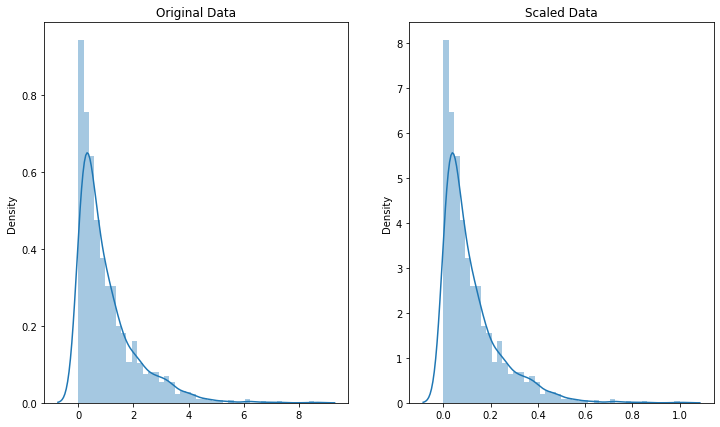

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (12, 7))
sns.distplot(generated_dataset, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")
plt.show()

### Max Absolute Scaler

This is used to scale all features based on the **maximum Absolute Value** of that respective feature. This technique works with each feature individually, it scales and transforms each feature on its own such that the max value of each feature will be 1 after scaling is complete.

**NOTE: It does not shift or center the datapoints hence does not destroy any sparsity. Also since this approach depends on the max value hence its sensitive to outliers**

In [27]:
from sklearn.preprocessing import MaxAbsScaler

In [28]:
min_max_scaler = MaxAbsScaler()

scaled_data = min_max_scaler.fit_transform(generated_dataset.reshape(-1, 1))

/home/prince/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/prince/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


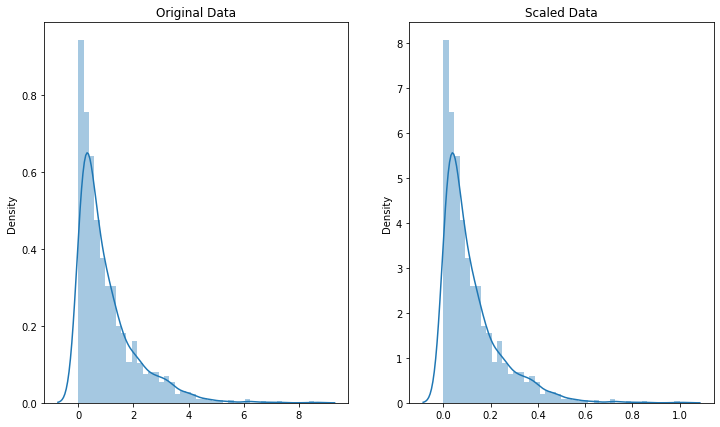

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (12, 7))
sns.distplot(generated_dataset, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")
plt.show()

### Standard Scaler

This is used to scale data such that the data **centers around 0** and with a **Standard Deviation of 1**

**This scaler works best with normally distributed data, if the dataset is not normally distributed, this is not the best scaler to consider or use.**

In [40]:
from sklearn.preprocessing import StandardScaler

min_max_scaler = StandardScaler()

scaled_data = min_max_scaler.fit_transform(generated_dataset.reshape(-1, 1))

/home/prince/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/prince/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


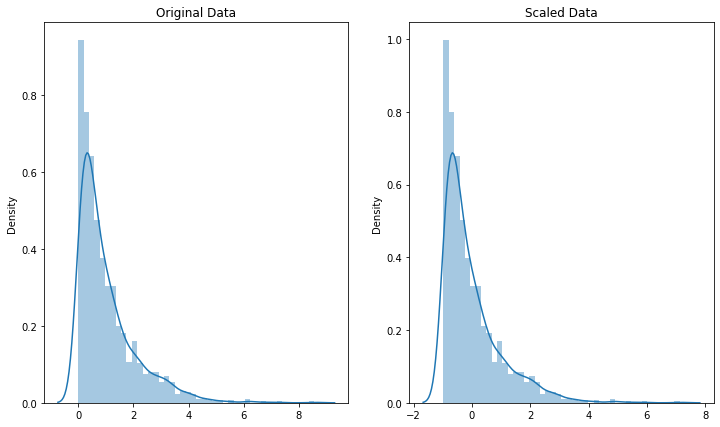

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (12, 7))
sns.distplot(generated_dataset, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")
plt.show()

### Robust Scaler (Scaling to median and quantiles)

As the name suggests, this scaler is not affected by outliers. This is because, it does not use mean and standard deviations. This approach removes the mean and uses the IQR(Interquartile range, the difference between the $1^{st}$ or $25^{th} quantile$ and the $3^{rd}$ quartile or $75^{th} quantile$ ) to scale the data since is not influence by outliers hence at the end, the outliers are still present in the dataset.

/home/prince/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/prince/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


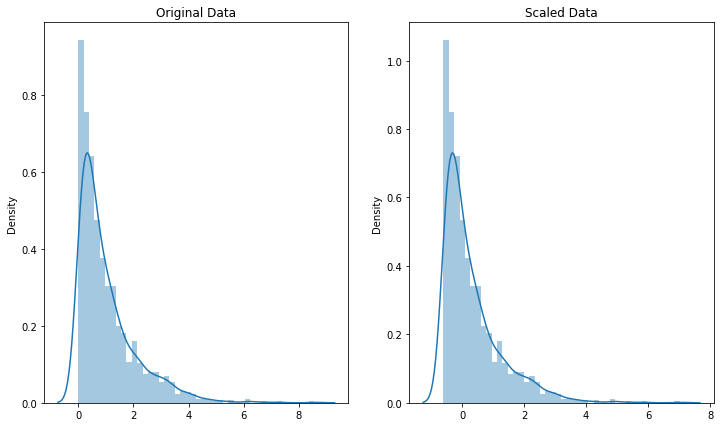

In [44]:
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler()

scaled_data = min_max_scaler.fit_transform(generated_dataset.reshape(-1, 1))

fig, ax = plt.subplots(1, 2, figsize = (12, 7))
sns.distplot(generated_dataset, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")
plt.show()

###  Quantile Scaler

As the name suggests, this scaler uses quantile information to scale data. It scales data to allow uniform and normal distribution of the data. It is robust and not affected by outliers by reducing outlier impacts.

**This model how ever affect linear correlation.**

/home/prince/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/prince/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


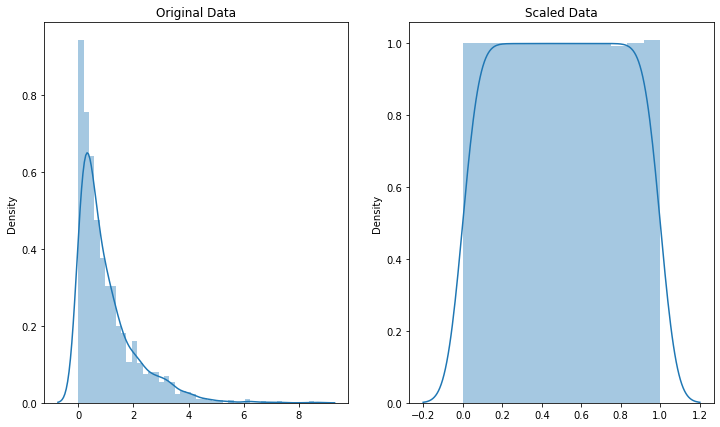

In [45]:
from sklearn.preprocessing import QuantileTransformer

min_max_scaler = QuantileTransformer()

scaled_data = min_max_scaler.fit_transform(generated_dataset.reshape(-1, 1))

fig, ax = plt.subplots(1, 2, figsize = (12, 7))
sns.distplot(generated_dataset, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")
plt.show()

**References**

[All About Feature Scaling](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

[How, When, and Why Should You Normalize / Standardize / Rescale Your Data?](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)

[Normalization vs Standardization — Quantitative analysis](https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf)

[What Does It Mean To Standardize Data](https://www.trifacta.com/standardize-data-in-excel/)

## Normalization

Normalization is used when we want to bound our values between two numbers, typically, between 0 and 1 or -1 and 1.

In [29]:
noramlized_dataset = scipy.stats.boxcox(generated_dataset)
noramlized_dataset

(array([-0.22196488,  0.23444484, -0.07909753, ..., -1.65319502,
        -2.18078616, -1.14931957]), 0.24821526769797236)

/home/prince/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/prince/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


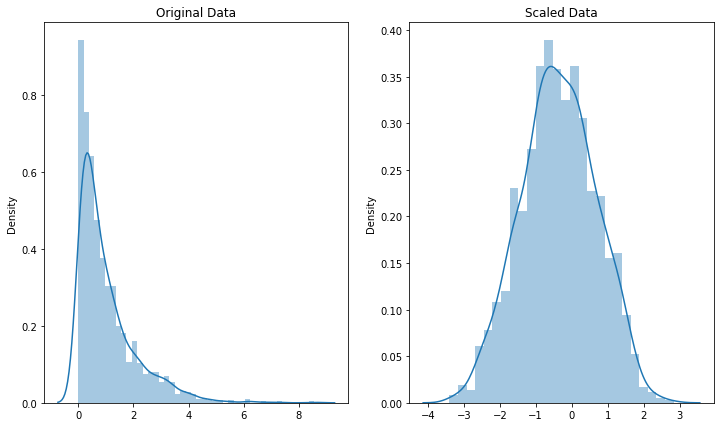

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (12, 7))
sns.distplot(generated_dataset, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(noramlized_dataset[0], ax=ax[1])
ax[1].set_title("Scaled Data")
plt.show()

## Standardization

This is another important data cleaning concept we need to pay attention to is **Standardization**. Standardization transforms the data to have zero mean and a variance of 1

## Actual Project

In [31]:
df = pd.read_csv("datasets/housePrices.csv")

In [32]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## Rename Columns

In [33]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [34]:
df.rename(columns={"hoa (R$)": "hoa", "rent amount (R$)": "rent", 
                   "property tax (R$)": "property_tax", 
                   "fire insurance (R$)": "fire_insurance", 
                   "total (R$)": "total"}, inplace = True
         )

In [35]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent', 'property_tax', 'fire_insurance',
       'total'],
      dtype='object')

In [36]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [37]:
interest_col = ["area", "hoa", "rent", "property_tax", "fire_insurance", "total"]